In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
train = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")
test = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/test.csv")

C:\Users\thaov\AppData\Local\Temp\ipykernel_14484\242139319.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")


In [4]:
import pandas as pd
# Đọc dữ liệu train
train_data = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/x_y_train.csv")

# Đọc dữ liệu test
test_data = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/x_y_test.csv")

# Train data
x_train = train_data.drop("Credit_Score", axis=1)
y_train = train_data["Credit_Score"]

# Test data
x_test = test_data.drop("Credit_Score", axis=1)
y_test = test_data["Credit_Score"]

In [5]:
print(f'x_train {x_train.shape}')
print(f'y_train {y_train.shape}')
print(f'x_test  {x_test.shape}')
print(f'y_test  {x_test.shape}')

x_train (54304, 25)
y_train (54304,)
x_test  (13577, 25)
y_test  (13577, 25)


# Decision Tree

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1234) # Tạo mô hình Decision Tree
dtree = dtree.fit(x_train, y_train) # huấn luyện mô hình Decision Tree

y_pred = dtree.predict(x_test) #Dự đoán trên tập dữ liệu test
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred , average='weighted')
f1 = f1_score(y_test, y_pred ,average='weighted')
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)

print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7081093024968697
Precision: 0.7085294109082807
Recall: 0.7081093024968697
F1 Score: 0.7083084753098768
Confusion Matrix:
[[2822 1069  101]
 [1065 5377  834]
 [ 103  791 1415]]

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71      3992
           2       0.74      0.74      0.74      7276
           3       0.60      0.61      0.61      2309

    accuracy                           0.71     13577
   macro avg       0.68      0.69      0.69     13577
weighted avg       0.71      0.71      0.71     13577



In [7]:
models = {
    'Decision Tree': {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    },
}

# K-Nearest Neighbor

In [8]:
#Mô hình K - láng giềng gần nhất
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()  #tạo mô hình
kn.fit(x_train, y_train)    #huấn luyện mô hình

kn_y_pred = kn.predict(x_test)  #dự đoán nhãn của x_test

kn_accuracy = accuracy_score(y_test, kn_y_pred)
kn_precision = precision_score(y_test, kn_y_pred,average='weighted')
kn_recall = recall_score(y_test, kn_y_pred , average='weighted')
kn_f1 = f1_score(y_test, kn_y_pred ,average='weighted')
kn_cm = confusion_matrix(y_test, kn_y_pred)

print("Accuracy:", kn_accuracy)
print("Precision:", kn_precision)
print("Recall:", kn_recall)
print("F1 Score:", kn_f1)
print("Confusion Matrix:")
print(kn_cm)

print()
print("Classification Report:")
print(classification_report(y_test, kn_y_pred))   #báo cáo phân loại

Accuracy: 0.6195035722177211
Precision: 0.6125548236671319
Recall: 0.6195035722177211
F1 Score: 0.6137512413240592
Confusion Matrix:
[[2466 1395  131]
 [1449 5112  715]
 [ 194 1282  833]]

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.62      0.61      3992
           2       0.66      0.70      0.68      7276
           3       0.50      0.36      0.42      2309

    accuracy                           0.62     13577
   macro avg       0.58      0.56      0.57     13577
weighted avg       0.61      0.62      0.61     13577



In [9]:
models['K-Nearest Neighbor'] = [kn_accuracy, kn_precision, kn_recall, kn_f1]

# Random Forest

In [10]:
#Mô hình RandomForestClassifier: một tập hợp các cây quyết định (decision trees), giảm thiểu overfitting
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)

rf_y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred,average='weighted')
rf_recall = recall_score(y_test, rf_y_pred , average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred ,average='weighted')
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)

print()
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Accuracy: 0.7750607645282463
Precision: 0.7742059948142123
Recall: 0.7750607645282463
F1 Score: 0.7743125193033431
Confusion Matrix:
[[3098  845   49]
 [ 859 5888  529]
 [  13  759 1537]]

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78      3992
           2       0.79      0.81      0.80      7276
           3       0.73      0.67      0.69      2309

    accuracy                           0.78     13577
   macro avg       0.76      0.75      0.76     13577
weighted avg       0.77      0.78      0.77     13577



In [11]:
models['Random Forest'] = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Support Vector Machine

In [12]:
#Mô hình Support Vector Machine 
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

sv_y_pred = sv.predict(x_test)

sv_accuracy = accuracy_score(y_test, sv_y_pred)
sv_precision = precision_score(y_test, sv_y_pred,average='weighted')
sv_recall = recall_score(y_test, sv_y_pred , average='weighted')
sv_f1 = f1_score(y_test, sv_y_pred ,average='weighted')
sv_cm = confusion_matrix(y_test, sv_y_pred)

print("Accuracy:", sv_accuracy)
print("Precision:", sv_precision)
print("Recall:", sv_recall)
print("F1 Score:", sv_f1)
print("Confusion Matrix:")
print(sv_cm)

print()
print("Classification Report:")
print(classification_report(y_test, sv_y_pred))

Accuracy: 0.5955660307873609
Precision: 0.49761409262605394
Recall: 0.5955660307873609
F1 Score: 0.5328312439487704
Confusion Matrix:
[[1990 2002    0]
 [1180 6096    0]
 [  32 2277    0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.50      0.55      3992
           2       0.59      0.84      0.69      7276
           3       0.00      0.00      0.00      2309

    accuracy                           0.60     13577
   macro avg       0.40      0.45      0.41     13577
weighted avg       0.50      0.60      0.53     13577



C:\Users\thaov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thaov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thaov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thaov\anaconda3\lib\site-packages\sklearn\metrics\_classifi

In [13]:
models['Support Vector Machine'] = [sv_accuracy, sv_precision, sv_recall, sv_f1]

# Logistic Regression

In [14]:
#Mô hình Logit (Logistic Regression)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

lr_y_pred = lr.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred,average='weighted')
lr_recall = recall_score(y_test, lr_y_pred , average='weighted')
lr_f1 = f1_score(y_test, lr_y_pred ,average='weighted')
lr_cm = confusion_matrix(y_test, lr_y_pred)

print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("Confusion Matrix:")
print(lr_cm)

print()
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

Accuracy: 0.58297120129631
Precision: 0.5744904542417102
Recall: 0.58297120129631
F1 Score: 0.5555648821320117
Confusion Matrix:
[[1609 2281  102]
 [1047 5809  420]
 [  28 1784  497]]

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.40      0.48      3992
           2       0.59      0.80      0.68      7276
           3       0.49      0.22      0.30      2309

    accuracy                           0.58     13577
   macro avg       0.56      0.47      0.49     13577
weighted avg       0.57      0.58      0.56     13577



C:\Users\thaov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
models['Logistic Regression'] = [lr_accuracy, lr_precision, lr_recall, lr_f1]

# Adaboost

In [16]:
#Mô hình Adaboost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)

ab_y_pred = ab.predict(x_test)

ab_accuracy = accuracy_score(y_test, ab_y_pred)
ab_precision = precision_score(y_test, ab_y_pred,average='weighted')
ab_recall = recall_score(y_test, ab_y_pred , average='weighted')
ab_f1 = f1_score(y_test, ab_y_pred ,average='weighted')
ab_cm = confusion_matrix(y_test, ab_y_pred)

print("Accuracy:", ab_accuracy)
print("Precision:", ab_precision)
print("Recall:", ab_recall)
print("F1 Score:", ab_f1)
print("Confusion Matrix:")
print(ab_cm)

print()
print("Classification Report:")
print(classification_report(y_test, ab_y_pred))

Accuracy: 0.6386536053620093
Precision: 0.6333303930635635
Recall: 0.6386536053620093
F1 Score: 0.6325507322287428
Confusion Matrix:
[[2320 1498  174]
 [1170 5423  683]
 [  47 1334  928]]

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.58      0.62      3992
           2       0.66      0.75      0.70      7276
           3       0.52      0.40      0.45      2309

    accuracy                           0.64     13577
   macro avg       0.61      0.58      0.59     13577
weighted avg       0.63      0.64      0.63     13577



In [17]:
models['Adaboost'] = [ab_accuracy, ab_precision, ab_recall, ab_f1]

# Mạng neural tích chập sâu

In [29]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Reshape dữ liệu để phù hợp với mô hình CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Chuyển đổi y thành categorical data
y_train_categorical = to_categorical(y_train-1)  # Chuyển về 0-indexed
y_test_categorical = to_categorical(y_test-1)

# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_reshaped, y_train_categorical, epochs=10, validation_data=(X_test_reshaped, y_test_categorical), verbose=1)

# Đánh giá mô hình trên tập dữ liệu kiểm tra
evaluation = model.evaluate(X_test_reshaped, y_test_categorical, verbose=1)

# Đánh giá hiệu suất của mô hình trên dữ liệu kiểm tra
loss, cnn_accuracy = model.evaluate(X_test_reshaped, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", cnn_accuracy)

# Dự đoán xác suất cho dữ liệu kiểm tra
y_pred_probabilities = model.predict(X_test_reshaped)
# Chọn lớp có xác suất cao nhất làm nhãn dự đoán
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Tiếp tục với việc tính precision, recall và F1-score như trước
from sklearn.metrics import precision_score, recall_score, f1_score
y_test_indices = np.argmax(y_test_categorical, axis=1)

cnn_precision = precision_score(y_test_indices, y_pred, average='weighted')
cnn_recall = recall_score(y_test_indices, y_pred, average='weighted')
cnn_f1 = f1_score(y_test_indices, y_pred, average='weighted')

print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1-score:", cnn_f1)

Epoch 1/10


C:\Users\thaov\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1697/1697 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6056 - loss: 0.8192 - val_accuracy: 0.6269 - val_loss: 0.7678
Epoch 2/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6287 - loss: 0.7727 - val_accuracy: 0.6344 - val_loss: 0.7606
Epoch 3/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6304 - loss: 0.7653 - val_accuracy: 0.6336 - val_loss: 0.7526
Epoch 4/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6344 - loss: 0.7627 - val_accuracy: 0.6359 - val_loss: 0.7548
Epoch 5/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6354 - loss: 0.7620 - val_accuracy: 0.6361 - val_loss: 0.7550
Epoch 6/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6359 - loss: 0.7562 - val_accuracy: 0.6343 - val_loss: 0.7571
Epoch 7/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6436 - loss: 0.7524 - val_accuracy: 0.6331 - val_loss: 0.7506
Epoch 8/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6450 - loss: 0.7470 - val_accurac

In [31]:
models['Convolutional Neural Network'] = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]

In [32]:
models

{'Decision Tree': {'Accuracy': 0.7081093024968697,
  'Precision': 0.7085294109082807,
  'Recall': 0.7081093024968697,
  'F1-score': 0.7083084753098768},
 'K-Nearest Neighbor': [0.6195035722177211,
  0.6125548236671319,
  0.6195035722177211,
  0.6137512413240592],
 'Random Forest': [0.7750607645282463,
  0.7742059948142123,
  0.7750607645282463,
  0.7743125193033431],
 'Support Vector Machine': [0.5955660307873609,
  0.49761409262605394,
  0.5955660307873609,
  0.5328312439487704],
 'Logistic Regression': [0.58297120129631,
  0.5744904542417102,
  0.58297120129631,
  0.5555648821320117],
 'Adaboost': [0.6386536053620093,
  0.6333303930635635,
  0.6386536053620093,
  0.6325507322287428],
 'Convolutional Neural Network': [0.6399057507514954,
  0.6379451263848424,
  0.6399057229137513,
  0.6380023038530278]}

# Mạng nơ ron hồi quy (Recurrent Neural Network)

In [40]:
from tensorflow.keras.layers import SimpleRNN, Dense
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Reshape the data for RNN (RNNs expect 3D input: [samples, timesteps, features])
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Convert labels to categorical
y_train_categorical = to_categorical(y_train - 1)  # Adjusting labels to be 0-indexed
y_test_categorical = to_categorical(y_test - 1)

# Define the RNN model
modelrnn = Sequential()
modelrnn.add(SimpleRNN(50, return_sequences=False, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
modelrnn.add(Dense(50, activation='relu'))
modelrnn.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
modelrnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
modelrnn.fit(X_train_reshaped, y_train_categorical, epochs=10, validation_data=(X_test_reshaped, y_test_categorical), verbose=1)

# Evaluate the model
evaluation = modelrnn.evaluate(X_test_reshaped, y_test_categorical, verbose=1)

# Đánh giá hiệu suất của mô hình trên dữ liệu kiểm tra
loss, rnn_accuracy = modelrnn.evaluate(X_test_reshaped, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", rnn_accuracy)

# Predict the probabilities and convert to class labels
y_pred_probabilities = modelrnn.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate precision, recall, and F1-score
y_test_indices = np.argmax(y_test_categorical, axis=1)

rnn_precision = precision_score(y_test_indices, y_pred, average='weighted')
rnn_recall = recall_score(y_test_indices, y_pred, average='weighted')
rnn_f1 = f1_score(y_test_indices, y_pred, average='weighted')

print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1-score:", rnn_f1)


Epoch 1/10


C:\Users\thaov\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1697/1697 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5725 - loss: 0.8653 - val_accuracy: 0.6192 - val_loss: 0.7863
Epoch 2/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6235 - loss: 0.7862 - val_accuracy: 0.6294 - val_loss: 0.7699
Epoch 3/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6293 - loss: 0.7739 - val_accuracy: 0.6334 - val_loss: 0.7599
Epoch 4/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6360 - loss: 0.7641 - val_accuracy: 0.6324 - val_loss: 0.7584
Epoch 5/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6348 - loss: 0.7618 - val_accuracy: 0.6373 - val_loss: 0.7588
Epoch 6/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6343 - loss: 0.7585 - val_accuracy: 0.6342 - val_loss: 0.7525
Epoch 7/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6376 - loss: 0.7560 - val_accuracy: 0.6347 - val_loss: 0.7569
Epoch 8/10
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6389 - loss: 0.7500 - val_accurac

In [41]:
models['Recurrent Neural Network'] = [rnn_accuracy, rnn_precision, rnn_recall, rnn_f1]

In [42]:
model_data = []
for model, metrics in models.items():
    if isinstance(metrics, dict):
        metrics_list = [metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1-score']]
    else:
        metrics_list = metrics
    model_data.append([model] + metrics_list)

df = pd.DataFrame(model_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
df

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.708109,0.708529,0.708109,0.708308
1,K-Nearest Neighbor,0.619504,0.612555,0.619504,0.613751
2,Random Forest,0.775061,0.774206,0.775061,0.774313
3,Support Vector Machine,0.595566,0.497614,0.595566,0.532831
4,Logistic Regression,0.582971,0.574490,0.582971,0.555565
5,Adaboost,0.638654,0.633330,0.638654,0.632551
6,Convolutional Neural Network,0.639906,0.637945,0.639906,0.638002
7,Recurrent Neural Network,0.638433,0.627540,0.638433,0.624349


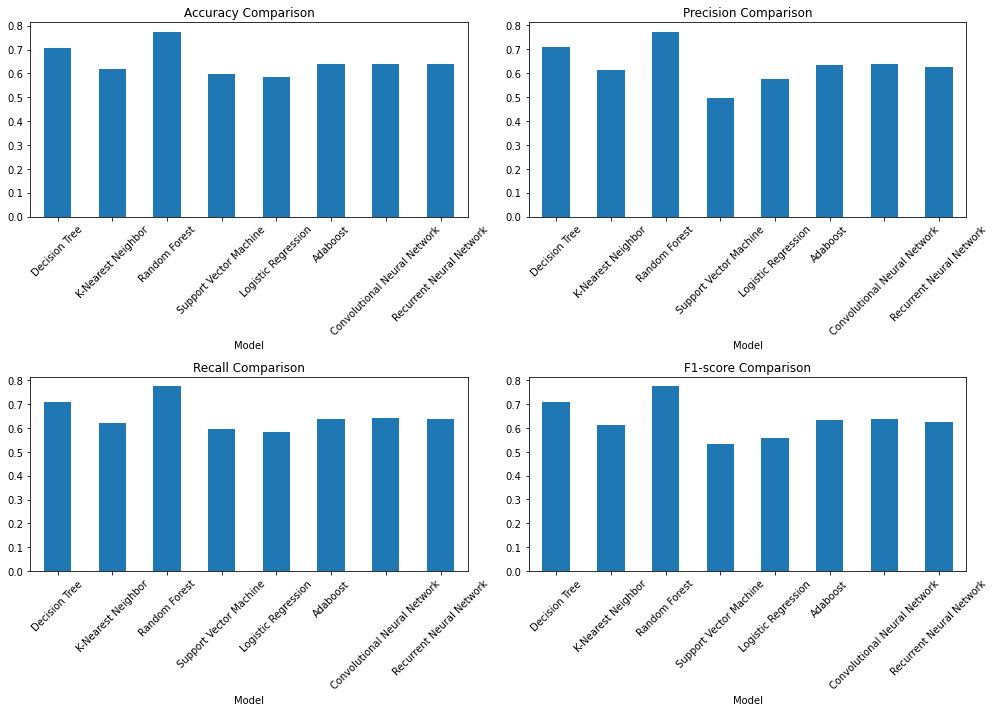

In [46]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, metric in zip(axes.flatten(), metrics):
    df_models.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_xticklabels(df['Model'], rotation=45)

plt.tight_layout()
plt.show()

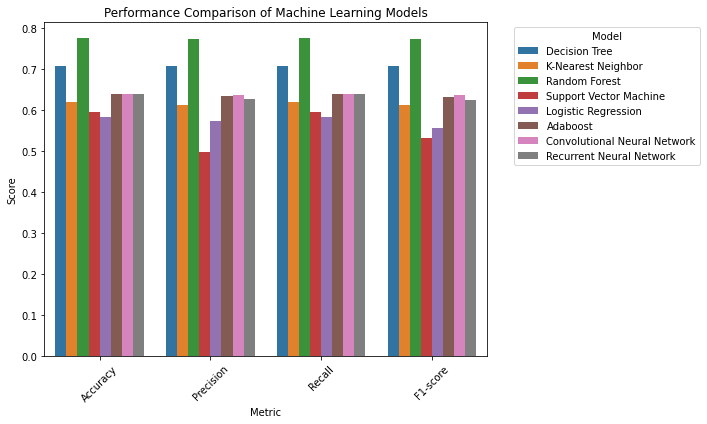

In [47]:
# Melting the DataFrame
df_melted = df_models.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plotting the melted DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title('Performance Comparison of Machine Learning Models')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

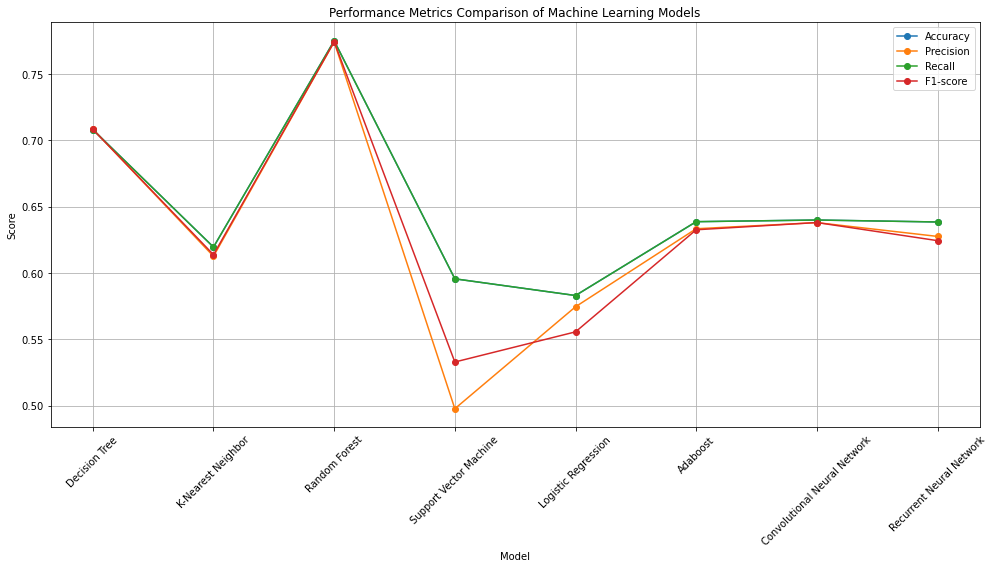

In [48]:
# Create a line plot for each performance metric
plt.figure(figsize=(14, 8))
for metric in df_melted['Metric'].unique():
    metric_data = df_melted[df_melted['Metric'] == metric]
    plt.plot(metric_data['Model'], metric_data['Score'], marker='o', label=metric)

plt.title('Performance Metrics Comparison of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Theo biểu đồ thấy được mô hình RANDOM FOREST có đánh giá hiệu suất tốt nhất

# Chạy thử tập dữ liệu Test

In [49]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [51]:
#loại bỏ tất cả các hàng trong DataFrame test mà có ít nhất một giá trị thiếu
test = test.dropna().copy()

#loại bỏ tất cả các hàng trong DataFrame test mà có ít nhất một giá trị thiếu
test = test.dropna().copy()

#Xóa các cột nằm ngoài phạm vi mô hình
test_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
test = test.drop(test_col , axis=1).copy()
test

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3,1,605.03,27 Years and 3 Months,No,18.816215,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816215,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3,2_,605.03,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
...,...,...,...,...,...,...,...,...,...,...,...
49992,29,Architect,20002.88,33,25,3571.7,6 Years and 4 Months,Yes,60.964772,Low_spent_Small_value_payments,314.8151526456419
49993,29,Architect,20002.88,33,25,3571.7,6 Years and 5 Months,Yes,60.964772,Low_spent_Small_value_payments,350.23147346441687
49994,29,_______,20002.88,33,22,3571.7,6 Years and 6 Months,Yes,60.964772,High_spent_Small_value_payments,341.179047488264
49997,25,Mechanic,39628.99,23,5,502.38,32 Years and 0 Months,No,35.104023,Low_spent_Large_value_payments,349.7263321025098


In [52]:
#Loại bỏ giá trị không chính xác
test = test[test['Occupation'].str.contains('_______') == False]
test = test[test['Payment_Behaviour'].str.contains('!@9#%8') == False]

#xử lý dữ liệu và loại bỏ các ký tự không hợp lệ trong các cột
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']
for i in col_int:
  for c in sym:
    test[i] = test[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    test[i] = test[i].replace(c,'')
test.head()

C:\Users\thaov\AppData\Local\Temp\ipykernel_14484\1717811805.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test[i] = test[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.57494921489417,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.57494921489417,High_spent_Medium_value_payments,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816214573128885,Low_spent_Large_value_payments,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18 Years and 6 Months,No,246.9923194537421,Low_spent_Large_value_payments,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17 Years and 11 Months,No,16.415451659824875,High_spent_Medium_value_payments,425.7266258262577


In [53]:
#Chuyển đổi thông tin thành giá trị
test['Credit_History_Age'] = test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
test['Credit_History_Age'] = test['Credit_History_Age'].astype(str).str.replace('Months','')

#Chuyển đổi thông tin thành giá trị theo cấp độ
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22.9,No,49.57494921489417,1,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22.10,No,49.57494921489417,5,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27.4,No,18.816214573128885,3,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18.6,No,246.9923194537421,3,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17.11,No,16.415451659824875,5,425.7266258262577


In [54]:
#Chuyển đổi dữ liệu oject thành kiểu dữ liệu float 
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  test[i] = test[i].astype(float)
test.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
dtype: object

In [55]:
# Chuyển đổi dữ liệu mục tiêu thành số
test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].str.replace('NM', '0')
test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].str.replace('Yes', '1')
test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].str.replace('No', '2')
test['Payment_of_Min_Amount'] = test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

test = pd.get_dummies(test, prefix='Occupation', columns=['Occupation'], drop_first=False)
test.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,0,1,0,0
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,0,1,0,0
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,0,1,0
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,0
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,1,0,0,0,0,0,0,0,0,0


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22703 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       22703 non-null  float64
 1   Annual_Income             22703 non-null  float64
 2   Delay_from_due_date       22703 non-null  float64
 3   Num_of_Delayed_Payment    22703 non-null  float64
 4   Outstanding_Debt          22703 non-null  float64
 5   Credit_History_Age        22703 non-null  float64
 6   Payment_of_Min_Amount     22703 non-null  int64  
 7   Total_EMI_per_month       22703 non-null  float64
 8   Payment_Behaviour         22703 non-null  float64
 9   Monthly_Balance           22703 non-null  float64
 10  Occupation_Accountant     22703 non-null  uint8  
 11  Occupation_Architect      22703 non-null  uint8  
 12  Occupation_Developer      22703 non-null  uint8  
 13  Occupation_Doctor         22703 non-null  uint8  
 14  Occupa

In [58]:
test.columns

Index(['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')

In [61]:
train_data.columns

Index(['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Score'],
      dtype='object')

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54304 entries, 0 to 54303
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       54304 non-null  float64
 1   Annual_Income             54304 non-null  float64
 2   Delay_from_due_date       54304 non-null  float64
 3   Num_of_Delayed_Payment    54304 non-null  float64
 4   Outstanding_Debt          54304 non-null  float64
 5   Credit_History_Age        54304 non-null  float64
 6   Payment_of_Min_Amount     54304 non-null  int64  
 7   Total_EMI_per_month       54304 non-null  float64
 8   Payment_Behaviour         54304 non-null  float64
 9   Monthly_Balance           54304 non-null  float64
 10  Occupation_Accountant     54304 non-null  int64  
 11  Occupation_Architect      54304 non-null  int64  
 12  Occupation_Developer      54304 non-null  int64  
 13  Occupation_Doctor         54304 non-null  int64  
 14  Occupa

In [63]:
Credit_Score = rf.predict(test)

In [64]:
test['Credit_Score'] = Credit_Score

In [65]:
test

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Score
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,1,0,0,2
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,1,0,0,2
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,1,0,2
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,2
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,50.0,37188.10,3.0,12.0,620.64,30.80,2,33013.000000,3.0,257.095501,...,0,0,0,0,0,0,0,0,1,2
49992,29.0,20002.88,33.0,25.0,3571.70,6.40,1,60.964772,1.0,314.815153,...,0,0,0,0,0,0,0,0,0,2
49993,29.0,20002.88,33.0,25.0,3571.70,6.50,1,60.964772,1.0,350.231473,...,0,0,0,0,0,0,0,0,0,2
49997,25.0,39628.99,23.0,5.0,502.38,32.00,2,35.104023,3.0,349.726332,...,0,0,0,1,0,0,0,0,0,2


# Xây dựng ứng dụng

In [66]:
#Lưu mô hình đã huấn luyện để sử dụng cho ứng dụng
import joblib
joblib.dump(rf, "C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib")

#In ra đường dẫn
print("Model saved to: C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib")


Model saved to: C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib


In [ ]:
#tải mô hình từ tệp
def load_model(filename):
    return joblib.load(filename)
#Hàm load_model có nhiệm vụ tải mô hình từ một tệp. Bạn chỉ cần cung cấp đường dẫn tới tệp chứa mô hình đã lưu (filename), và hàm sẽ trả về mô hình đã được tải vào bộ nhớ.

In [ ]:
def score_customer(model, customer_data):
    """
    Dựa vào mô hình đã huấn luyện và dữ liệu của khách hàng, dự đoán điểm cho khách hàng.
    Dữ liệu khách hàng cần phải có dạng cấu trúc mảng 2 chiều với kích thước (1, n_features)
    """
    return model.predict(customer_data)

Hàm score_customer nhận vào mô hình (model) và dữ liệu của khách hàng (customer_data). Hàm sẽ sử dụng mô hình để dự đoán và trả về kết quả. Dữ liệu của khách hàng phải được cung cấp dưới dạng một mảng 2 chiều, nơi chiều thứ nhất là số lượng mẫu (trong trường hợp này là 1 vì chúng ta chỉ dự đoán cho một khách hàng), và chiều thứ hai là số lượng đặc trưng mà mô hình yêu cầu.

Phần sau đây mô tả cách sử dụng hai hàm trên trong một ứng dụng:

- Giả sử `new_customer_data` là một cấu trúc mảng 2D với dữ liệu mới
- trained_model = load_model('random_forest_model.joblib')
- customer_score = score_customer(trained_model, new_customer_data)
- print("Điểm dự đoán cho khách hàng là:", customer_score)

Đây là phần mã giả được bình luận để mô tả cách thức sử dụng hàm. Trong thực tế, bạn sẽ gỡ bỏ các dấu # để chạy mã này. Bạn sẽ tải mô hình đã huấn luyện từ tệp random_forest_model.joblib, sau đó sử dụng mô hình này để dự đoán điểm dựa trên new_customer_data, là dữ liệu mới của khách hàng. Kết quả dự đoán sẽ được in ra màn hình.

Lưu ý rằng dữ liệu mới của khách hàng cần được xử lý trước khi dự đoán (ví dụ, qua các bước chuẩn hóa hoặc mã hóa) tương tự như cách dữ liệu đã được chuẩn bị khi huấn luyện mô hình.